In [1]:
# import requierment libarary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
from math import ceil

Pandas backend loaded 1.3.4
Numpy backend loaded 1.20.3
Pyspark backend NOT loaded
Python backend loaded


In [2]:
# import data
data = pd.read_csv("E:\machine learning/EnglandWeather.csv")
data

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)  Humidity  
0             9.472222            14.1197               1015.13      0.89  
1             9.355556            14.2646               1015.63      0.86  
2             9.377778             3.9284               1015.94      0.89  
3             8.288889            14.1036               1016.41      0.83  
4             8.755556            11.0446               1016.51      0.83  
...                ...                ...                   ...       ...  
96448        26.016667            10.9963               1014.36      0.43  
96449        24.583333            10.0947               1015.16      0.48  
96450        22.038889             8.9838               1015.66      0.56  
96451        21.522222            10.5294               1015.95      0.60  
96452        20.438889             5.8765               1016.16      0.61  

[96453 rows x 7 columns]

In [3]:
df = pd.DataFrame(data)
df_rows_count, df_columns_count = df.shape
print(f'number of samples: {df_rows_count}')
print(f'number of columns: {df_columns_count}')
df.head(7)

number of samples: 96453
number of columns: 7


Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   
5  2006-04-01 05:00:00.000 +0200  Partly Cloudy        rain         9.222222   
6  2006-04-01 06:00:00.000 +0200  Partly Cloudy        rain         7.733333   

   Wind Speed (km/h)  Pressure (millibars)  Humidity  
0            14.1197               1015.13      0.89  
1            14.2646               1015.63      0.86  
2             3.9284               1015.94      0.89  
3            14.1036               1016.41      0.83  
4            11.0446               1016.51      0.83  
5            13.9587               1016.66      0.85  
6            12.3648               1016.72      0.95

# 1.Cleaning Data

In [4]:
# Data profilling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Formatted Date        96453 non-null  object 
 1   Summary               96453 non-null  object 
 2   Precip Type           95936 non-null  object 
 3   Temperature (C)       96453 non-null  float64
 4   Wind Speed (km/h)     96453 non-null  float64
 5   Pressure (millibars)  96453 non-null  float64
 6   Humidity              96453 non-null  float64
dtypes: float64(4), object(3)
memory usage: 5.2+ MB


In [5]:
# separate object and float columns and describe both of them
df_num = df.select_dtypes(['float64'])
df_obj = df.select_dtypes(['object'])

In [6]:
df_num.describe()

Temperature (C)  Wind Speed (km/h)  Pressure (millibars)      Humidity
count     96453.000000       96453.000000          96453.000000  96453.000000
mean         11.932678          10.810640           1003.235956      0.734899
std           9.551546           6.913571            116.969906      0.195473
min         -21.822222           0.000000              0.000000      0.000000
25%           4.688889           5.828200           1011.900000      0.600000
50%          12.000000           9.965900           1016.450000      0.780000
75%          18.838889          14.135800           1021.090000      0.890000
max          39.905556          63.852600           1046.380000      1.000000

In [7]:
df_obj.describe()

Formatted Date        Summary Precip Type
count                           96453          96453       95936
unique                          96429             27           2
top     2010-08-02 00:00:00.000 +0200  Partly Cloudy        rain
freq                                2          31733       85224

In [8]:
# Detect duplicate data
print(f'number of duplicated data: {len(df[df.duplicated()])}')
df[df.duplicated()]

number of duplicated data: 24


Formatted Date        Summary Precip Type  \
36072  2010-08-02 00:00:00.000 +0200          Clear        rain   
36073  2010-08-02 01:00:00.000 +0200          Clear        rain   
36074  2010-08-02 02:00:00.000 +0200          Clear        rain   
36075  2010-08-02 03:00:00.000 +0200          Clear        rain   
36076  2010-08-02 04:00:00.000 +0200          Clear        rain   
36077  2010-08-02 05:00:00.000 +0200          Clear        rain   
36078  2010-08-02 06:00:00.000 +0200          Clear        rain   
36079  2010-08-02 07:00:00.000 +0200          Clear        rain   
36080  2010-08-02 08:00:00.000 +0200          Clear        rain   
36081  2010-08-02 09:00:00.000 +0200          Clear        rain   
36082  2010-08-02 10:00:00.000 +0200          Clear        rain   
36083  2010-08-02 11:00:00.000 +0200          Clear        rain   
36084  2010-08-02 12:00:00.000 +0200          Clear        rain   
36085  2010-08-02 13:00:00.000 +0200  Partly Cloudy        rain   
36086  2010-08-02 14:00:00.000 +0200  Partly Cloudy        rain   
36087  2010-08-02 15:00:00.000 +0200  Partly Cloudy        rain   
36088  2010-08-02 16:00:00.000 +0200  Partly Cloudy        rain   
36089  2010-08-02 17:00:00.000 +0200  Partly Cloudy        rain   
36090  2010-08-02 18:00:00.000 +0200  Partly Cloudy        rain   
36091  2010-08-02 19:00:00.000 +0200          Clear        rain   
36092  2010-08-02 20:00:00.000 +0200          Clear        rain   
36093  2010-08-02 21:00:00.000 +0200          Clear        rain   
36094  2010-08-02 22:00:00.000 +0200  Partly Cloudy        rain   
36095  2010-08-02 23:00:00.000 +0200          Clear        rain   

       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)  Humidity  
36072        18.800000             6.2790               1016.99      0.93  
36073        18.222222             6.2790               1017.09      0.97  
36074        18.072222            11.2700               1013.23      0.98  
36075        16.622222             6.4400               1016.78      0.99  
36076        16.094444             3.0751               1016.67      0.99  
36077        15.955556             3.8801               1016.69      0.99  
36078        17.088889             6.4400               1017.08      1.00  
36079        20.822222             3.2200               1017.27      0.87  
36080        23.405556             1.8837               1017.27      0.74  
36081        26.050000             1.5939               1017.15      0.59  
36082        27.688889             0.2254               1016.68      0.50  
36083        28.561111             3.2039               1016.58      0.54  
36084        28.816667             1.6100               1016.55      0.49  
36085        28.866667             2.8175               1015.99      0.46  
36086        29.827778             8.0339               1015.50      0.47  
36087        30.072222             2.5921               1014.97      0.46  
36088        31.066667             1.3846               1014.47      0.44  
36089        30.861111             2.2540               1014.08      0.44  
36090        29.950000             3.0751               1013.59      0.46  
36091        28.811111             3.2039               1013.19      0.59  
36092        25.250000             2.4955               1013.20      0.75  
36093        22.172222             1.6100               1013.49      0.87  
36094        21.061111             0.0000               1013.37      0.90  
36095        20.255556             1.0787               1013.00      0.92

According to above table we have duplicated data so we drop them in the following:

In [9]:
df1 = df.copy()
df1 = df1.drop_duplicates()
df1

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)  Humidity  
0             9.472222            14.1197               1015.13      0.89  
1             9.355556            14.2646               1015.63      0.86  
2             9.377778             3.9284               1015.94      0.89  
3             8.288889            14.1036               1016.41      0.83  
4             8.755556            11.0446               1016.51      0.83  
...                ...                ...                   ...       ...  
96448        26.016667            10.9963               1014.36      0.43  
96449        24.583333            10.0947               1015.16      0.48  
96450        22.038889             8.9838               1015.66      0.56  
96451        21.522222            10.5294               1015.95      0.60  
96452        20.438889             5.8765               1016.16      0.61  

[96429 rows x 7 columns]

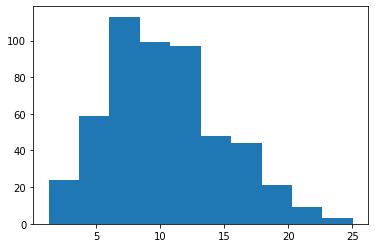

In [10]:
# detect and solve missing value
# According to info table at the first we have missing value only in Precip Type column
# now we try to detect value of missing value, if not we drop them
miss_val = df1[df1['Precip Type'].isna()]
plt.hist(miss_val['Temperature (C)'])
plt.show()

In [11]:
df1[df1['Temperature (C)'] >= 0]['Precip Type'].value_counts()

rain    85200
snow      325
Name: Precip Type, dtype: int64

In [12]:
df2 = df1.copy()
df2.fillna('rain', inplace=True)

In [13]:
# verifing
df2.isna().sum()

Formatted Date          0
Summary                 0
Precip Type             0
Temperature (C)         0
Wind Speed (km/h)       0
Pressure (millibars)    0
Humidity                0
dtype: int64

In [14]:
# Type Conversion
# convert Formatted Date type to datetime
df3 = df2.copy()
df3['Formatted Date'] = pd.to_datetime(df3['Formatted Date'], utc=True)
df3['Formatted Date'].dtype

datetime64[ns, UTC]

In [15]:
# convert Summary and Precip Type type to category
# df3 = df3.astype({'Summary':'category', 'Precip Type':'category'})
# df3.dtypes

In [16]:
# Standardize
# 1. convert Humidity to percent
df3['Humidity'] = df3['Humidity']*100

# 2. sort values by Formatted Date
df3 = df3.sort_values('Formatted Date')

# 3. define new index
df3 = df3.reset_index(drop=True)
df3

Formatted Date        Summary Precip Type  Temperature (C)  \
0     2005-12-31 23:00:00+00:00  Partly Cloudy        rain         0.577778   
1     2006-01-01 00:00:00+00:00  Mostly Cloudy        rain         1.161111   
2     2006-01-01 01:00:00+00:00  Mostly Cloudy        rain         1.666667   
3     2006-01-01 02:00:00+00:00       Overcast        rain         1.711111   
4     2006-01-01 03:00:00+00:00  Mostly Cloudy        rain         1.183333   
...                         ...            ...         ...              ...   
96424 2016-12-31 18:00:00+00:00  Mostly Cloudy        rain         0.488889   
96425 2016-12-31 19:00:00+00:00  Mostly Cloudy        rain         0.072222   
96426 2016-12-31 20:00:00+00:00  Mostly Cloudy        snow        -0.233333   
96427 2016-12-31 21:00:00+00:00  Mostly Cloudy        snow        -0.472222   
96428 2016-12-31 22:00:00+00:00  Mostly Cloudy        snow        -0.677778   

       Wind Speed (km/h)  Pressure (millibars)  Humidity  
0                17.1143               1016.66      89.0  
1                16.6152               1016.15      85.0  
2                20.2538               1015.87      82.0  
3                14.4900               1015.56      82.0  
4                13.9426               1014.98      86.0  
...                  ...                   ...       ...  
96424             9.7566               1020.03      86.0  
96425             9.4185               1020.27      88.0  
96426             9.2736               1020.50      89.0  
96427             9.2414               1020.65      91.0  
96428             9.2253               1020.72      92.0  

[96429 rows x 7 columns]

In [17]:
# split date and time
df4 = df3.copy()
df4['Date'] = pd.to_datetime(df4['Formatted Date']).dt.date.astype('datetime64[ns]')
df4['Time'] = df4['Formatted Date'].dt.time
df4.drop('Formatted Date', axis='columns', inplace=True)
df4

Summary Precip Type  Temperature (C)  Wind Speed (km/h)  \
0      Partly Cloudy        rain         0.577778            17.1143   
1      Mostly Cloudy        rain         1.161111            16.6152   
2      Mostly Cloudy        rain         1.666667            20.2538   
3           Overcast        rain         1.711111            14.4900   
4      Mostly Cloudy        rain         1.183333            13.9426   
...              ...         ...              ...                ...   
96424  Mostly Cloudy        rain         0.488889             9.7566   
96425  Mostly Cloudy        rain         0.072222             9.4185   
96426  Mostly Cloudy        snow        -0.233333             9.2736   
96427  Mostly Cloudy        snow        -0.472222             9.2414   
96428  Mostly Cloudy        snow        -0.677778             9.2253   

       Pressure (millibars)  Humidity       Date      Time  
0                   1016.66      89.0 2005-12-31  23:00:00  
1                   1016.15      85.0 2006-01-01  00:00:00  
2                   1015.87      82.0 2006-01-01  01:00:00  
3                   1015.56      82.0 2006-01-01  02:00:00  
4                   1014.98      86.0 2006-01-01  03:00:00  
...                     ...       ...        ...       ...  
96424               1020.03      86.0 2016-12-31  18:00:00  
96425               1020.27      88.0 2016-12-31  19:00:00  
96426               1020.50      89.0 2016-12-31  20:00:00  
96427               1020.65      91.0 2016-12-31  21:00:00  
96428               1020.72      92.0 2016-12-31  22:00:00  

[96429 rows x 8 columns]

In [18]:
# We arrange the columns so that the Date and Time are the first columns
cols = df4.columns.to_list()
cols = cols[-2:] + cols[:-2]
df4 = df4[cols]
df4.dtypes

Date                    datetime64[ns]
Time                            object
Summary                         object
Precip Type                     object
Temperature (C)                float64
Wind Speed (km/h)              float64
Pressure (millibars)           float64
Humidity                       float64
dtype: object

# 2. Data Preparing

In [19]:
# create time column and set Formatted Date for index
df5 = df3.copy()
df5['Time'] = df5['Formatted Date'].dt.time
df5 = df5.set_index('Formatted Date')
df5

Summary Precip Type  Temperature (C)  \
Formatted Date                                                          
2005-12-31 23:00:00+00:00  Partly Cloudy        rain         0.577778   
2006-01-01 00:00:00+00:00  Mostly Cloudy        rain         1.161111   
2006-01-01 01:00:00+00:00  Mostly Cloudy        rain         1.666667   
2006-01-01 02:00:00+00:00       Overcast        rain         1.711111   
2006-01-01 03:00:00+00:00  Mostly Cloudy        rain         1.183333   
...                                  ...         ...              ...   
2016-12-31 18:00:00+00:00  Mostly Cloudy        rain         0.488889   
2016-12-31 19:00:00+00:00  Mostly Cloudy        rain         0.072222   
2016-12-31 20:00:00+00:00  Mostly Cloudy        snow        -0.233333   
2016-12-31 21:00:00+00:00  Mostly Cloudy        snow        -0.472222   
2016-12-31 22:00:00+00:00  Mostly Cloudy        snow        -0.677778   

                           Wind Speed (km/h)  Pressure (millibars)  Humidity  \
Formatted Date                                                                 
2005-12-31 23:00:00+00:00            17.1143               1016.66      89.0   
2006-01-01 00:00:00+00:00            16.6152               1016.15      85.0   
2006-01-01 01:00:00+00:00            20.2538               1015.87      82.0   
2006-01-01 02:00:00+00:00            14.4900               1015.56      82.0   
2006-01-01 03:00:00+00:00            13.9426               1014.98      86.0   
...                                      ...                   ...       ...   
2016-12-31 18:00:00+00:00             9.7566               1020.03      86.0   
2016-12-31 19:00:00+00:00             9.4185               1020.27      88.0   
2016-12-31 20:00:00+00:00             9.2736               1020.50      89.0   
2016-12-31 21:00:00+00:00             9.2414               1020.65      91.0   
2016-12-31 22:00:00+00:00             9.2253               1020.72      92.0   

                               Time  
Formatted Date                       
2005-12-31 23:00:00+00:00  23:00:00  
2006-01-01 00:00:00+00:00  00:00:00  
2006-01-01 01:00:00+00:00  01:00:00  
2006-01-01 02:00:00+00:00  02:00:00  
2006-01-01 03:00:00+00:00  03:00:00  
...                             ...  
2016-12-31 18:00:00+00:00  18:00:00  
2016-12-31 19:00:00+00:00  19:00:00  
2016-12-31 20:00:00+00:00  20:00:00  
2016-12-31 21:00:00+00:00  21:00:00  
2016-12-31 22:00:00+00:00  22:00:00  

[96429 rows x 7 columns]

In [20]:
# We arrange the columns so that the Time is the first column
cols = df5.columns.to_list()
cols = cols[-1:] + cols[:-1]
df5 = df5[cols]
df5

Time        Summary Precip Type  \
Formatted Date                                                   
2005-12-31 23:00:00+00:00  23:00:00  Partly Cloudy        rain   
2006-01-01 00:00:00+00:00  00:00:00  Mostly Cloudy        rain   
2006-01-01 01:00:00+00:00  01:00:00  Mostly Cloudy        rain   
2006-01-01 02:00:00+00:00  02:00:00       Overcast        rain   
2006-01-01 03:00:00+00:00  03:00:00  Mostly Cloudy        rain   
...                             ...            ...         ...   
2016-12-31 18:00:00+00:00  18:00:00  Mostly Cloudy        rain   
2016-12-31 19:00:00+00:00  19:00:00  Mostly Cloudy        rain   
2016-12-31 20:00:00+00:00  20:00:00  Mostly Cloudy        snow   
2016-12-31 21:00:00+00:00  21:00:00  Mostly Cloudy        snow   
2016-12-31 22:00:00+00:00  22:00:00  Mostly Cloudy        snow   

                           Temperature (C)  Wind Speed (km/h)  \
Formatted Date                                                  
2005-12-31 23:00:00+00:00         0.577778            17.1143   
2006-01-01 00:00:00+00:00         1.161111            16.6152   
2006-01-01 01:00:00+00:00         1.666667            20.2538   
2006-01-01 02:00:00+00:00         1.711111            14.4900   
2006-01-01 03:00:00+00:00         1.183333            13.9426   
...                                    ...                ...   
2016-12-31 18:00:00+00:00         0.488889             9.7566   
2016-12-31 19:00:00+00:00         0.072222             9.4185   
2016-12-31 20:00:00+00:00        -0.233333             9.2736   
2016-12-31 21:00:00+00:00        -0.472222             9.2414   
2016-12-31 22:00:00+00:00        -0.677778             9.2253   

                           Pressure (millibars)  Humidity  
Formatted Date                                             
2005-12-31 23:00:00+00:00               1016.66      89.0  
2006-01-01 00:00:00+00:00               1016.15      85.0  
2006-01-01 01:00:00+00:00               1015.87      82.0  
2006-01-01 02:00:00+00:00               1015.56      82.0  
2006-01-01 03:00:00+00:00               1014.98      86.0  
...                                         ...       ...  
2016-12-31 18:00:00+00:00               1020.03      86.0  
2016-12-31 19:00:00+00:00               1020.27      88.0  
2016-12-31 20:00:00+00:00               1020.50      89.0  
2016-12-31 21:00:00+00:00               1020.65      91.0  
2016-12-31 22:00:00+00:00               1020.72      92.0  

[96429 rows x 7 columns]

In [21]:
# create daily DataFrame
clean_data = df5.copy()
clean_data['Type_rate'] = clean_data['Precip Type'].replace({'rain':1, 'snow':0})
df_daily = clean_data.resample('D').mean()
df_daily

Temperature (C)  Wind Speed (km/h)  \
Formatted Date                                                  
2005-12-31 00:00:00+00:00         0.577778          17.114300   
2006-01-01 00:00:00+00:00         4.075000          21.229192   
2006-01-02 00:00:00+00:00         5.263194          17.824713   
2006-01-03 00:00:00+00:00         2.340509           7.726658   
2006-01-04 00:00:00+00:00         2.251852          12.152817   
...                                    ...                ...   
2016-12-27 00:00:00+00:00         0.278009          10.979529   
2016-12-28 00:00:00+00:00         0.222222          10.968125   
2016-12-29 00:00:00+00:00         0.167824          10.876892   
2016-12-30 00:00:00+00:00         0.117593          10.810479   
2016-12-31 00:00:00+00:00         0.113527          10.836700   

                           Pressure (millibars)   Humidity  Type_rate  
Formatted Date                                                         
2005-12-31 00:00:00+00:00           1016.660000  89.000000   1.000000  
2006-01-01 00:00:00+00:00           1011.985000  81.708333   1.000000  
2006-01-02 00:00:00+00:00           1010.384167  84.708333   1.000000  
2006-01-03 00:00:00+00:00           1021.170833  89.708333   1.000000  
2006-01-04 00:00:00+00:00            981.770833  90.666667   1.000000  
...                                         ...        ...        ...  
2016-12-27 00:00:00+00:00           1020.305833  89.000000   0.500000  
2016-12-28 00:00:00+00:00           1020.335833  89.000000   0.458333  
2016-12-29 00:00:00+00:00           1020.367083  88.958333   0.458333  
2016-12-30 00:00:00+00:00           1020.396250  88.916667   0.458333  
2016-12-31 00:00:00+00:00           1020.413043  88.652174   0.478261  

[4019 rows x 5 columns]

In [22]:
# create monthly DataFrame
df_monthly = clean_data.resample('MS').mean()
df_monthly

Temperature (C)  Wind Speed (km/h)  \
Formatted Date                                                  
2005-12-01 00:00:00+00:00         0.577778          17.114300   
2006-01-01 00:00:00+00:00        -1.677942           8.894211   
2006-02-01 00:00:00+00:00        -0.065394          10.957008   
2006-03-01 00:00:00+00:00         4.559274          14.421488   
2006-04-01 00:00:00+00:00        12.635031          10.930670   
...                                    ...                ...   
2016-08-01 00:00:00+00:00        21.420296           9.151378   
2016-09-01 00:00:00+00:00        18.467924           6.849029   
2016-10-01 00:00:00+00:00         9.893242          11.566855   
2016-11-01 00:00:00+00:00         5.282662          10.302860   
2016-12-01 00:00:00+00:00         1.239158          11.024860   

                           Pressure (millibars)   Humidity  Type_rate  
Formatted Date                                                         
2005-12-01 00:00:00+00:00           1016.660000  89.000000   1.000000  
2006-01-01 00:00:00+00:00           1021.204960  83.461022   0.385753  
2006-02-01 00:00:00+00:00            995.183914  84.346726   0.447917  
2006-03-01 00:00:00+00:00            976.436263  77.873656   0.776882  
2006-04-01 00:00:00+00:00           1013.493694  72.862500   1.000000  
...                                         ...        ...        ...  
2016-08-01 00:00:00+00:00           1018.026398  67.404570   1.000000  
2016-09-01 00:00:00+00:00           1017.969736  68.883333   1.000000  
2016-10-01 00:00:00+00:00           1020.521210  79.990591   1.000000  
2016-11-01 00:00:00+00:00           1019.297486  84.847222   1.000000  
2016-12-01 00:00:00+00:00           1019.946339  88.798116   0.695828  

[133 rows x 5 columns]

In [23]:
# create yearly DataFrame
df_yearly = clean_data.resample('Y').mean()
df_yearly

Temperature (C)  Wind Speed (km/h)  \
Formatted Date                                                  
2005-12-31 00:00:00+00:00         0.577778          17.114300   
2006-12-31 00:00:00+00:00        11.215225          10.189128   
2007-12-31 00:00:00+00:00        12.134677          10.824162   
2008-12-31 00:00:00+00:00        12.161819          11.304172   
2009-12-31 00:00:00+00:00        12.269682          11.507326   
2010-12-31 00:00:00+00:00        11.165292          11.034936   
2011-12-31 00:00:00+00:00        11.524934           9.898596   
2012-12-31 00:00:00+00:00        11.986824          11.264745   
2013-12-31 00:00:00+00:00        11.941017          10.970036   
2014-12-31 00:00:00+00:00        12.528228          10.501276   
2015-12-31 00:00:00+00:00        12.312088          10.735590   
2016-12-31 00:00:00+00:00        11.987381          10.703967   

                           Pressure (millibars)   Humidity  Type_rate  
Formatted Date                                                         
2005-12-31 00:00:00+00:00           1016.660000  89.000000   1.000000  
2006-12-31 00:00:00+00:00            992.545486  76.734932   0.852511  
2007-12-31 00:00:00+00:00           1001.639412  68.964726   0.914954  
2008-12-31 00:00:00+00:00           1007.734488  70.123862   0.909039  
2009-12-31 00:00:00+00:00           1002.605055  70.724658   0.883790  
2010-12-31 00:00:00+00:00           1004.786295  79.706507   0.848174  
2011-12-31 00:00:00+00:00           1014.183506  73.600799   0.840411  
2012-12-31 00:00:00+00:00            999.341404  68.951275   0.852117  
2013-12-31 00:00:00+00:00           1004.951297  75.419749   0.882991  
2014-12-31 00:00:00+00:00            987.277688  74.857143   0.944616  
2015-12-31 00:00:00+00:00           1005.297210  73.235388   0.928311  
2016-12-31 00:00:00+00:00           1015.160243  76.086759   0.921098

In [24]:
# create hourly DataFrame
df_hourly = clean_data.resample('H').mean()
df_hourly

Temperature (C)  Wind Speed (km/h)  \
Formatted Date                                                  
2005-12-31 23:00:00+00:00         0.577778            17.1143   
2006-01-01 00:00:00+00:00         1.161111            16.6152   
2006-01-01 01:00:00+00:00         1.666667            20.2538   
2006-01-01 02:00:00+00:00         1.711111            14.4900   
2006-01-01 03:00:00+00:00         1.183333            13.9426   
...                                    ...                ...   
2016-12-31 18:00:00+00:00         0.488889             9.7566   
2016-12-31 19:00:00+00:00         0.072222             9.4185   
2016-12-31 20:00:00+00:00        -0.233333             9.2736   
2016-12-31 21:00:00+00:00        -0.472222             9.2414   
2016-12-31 22:00:00+00:00        -0.677778             9.2253   

                           Pressure (millibars)  Humidity  Type_rate  
Formatted Date                                                        
2005-12-31 23:00:00+00:00               1016.66      89.0        1.0  
2006-01-01 00:00:00+00:00               1016.15      85.0        1.0  
2006-01-01 01:00:00+00:00               1015.87      82.0        1.0  
2006-01-01 02:00:00+00:00               1015.56      82.0        1.0  
2006-01-01 03:00:00+00:00               1014.98      86.0        1.0  
...                                         ...       ...        ...  
2016-12-31 18:00:00+00:00               1020.03      86.0        1.0  
2016-12-31 19:00:00+00:00               1020.27      88.0        1.0  
2016-12-31 20:00:00+00:00               1020.50      89.0        0.0  
2016-12-31 21:00:00+00:00               1020.65      91.0        0.0  
2016-12-31 22:00:00+00:00               1020.72      92.0        0.0  

[96432 rows x 5 columns]

# 3.Exploratory Data Analysis

In [25]:
pdp.ProfileReport(df5)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

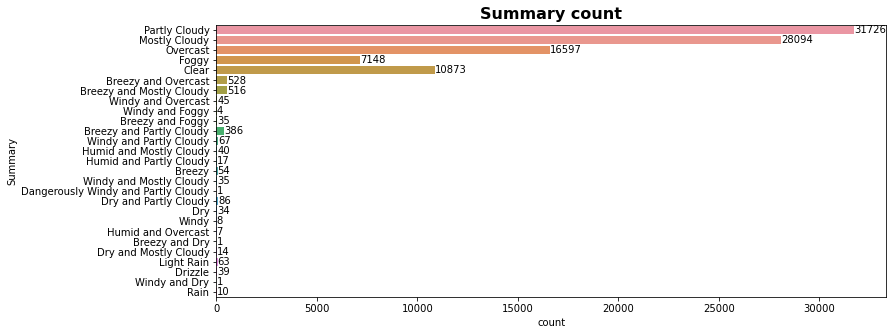

In [26]:
# Categorical Unordered Univariate Analysis (Summary column)
fig , ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(y='Summary', data=df5)
ax.bar_label(ax.containers[0])
plt.title('Summary count', fontsize=16, fontweight='bold')
plt.show()

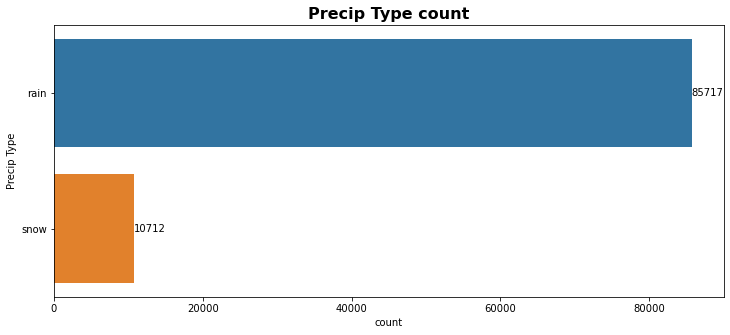

In [27]:
# Categorical Unordered Univariate Analysis (Precip Type column)
fig , ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(y=df5['Precip Type'], data=df5)
ax.bar_label(ax.containers[0])
plt.title('Precip Type count', fontsize=16, fontweight='bold')
plt.show()

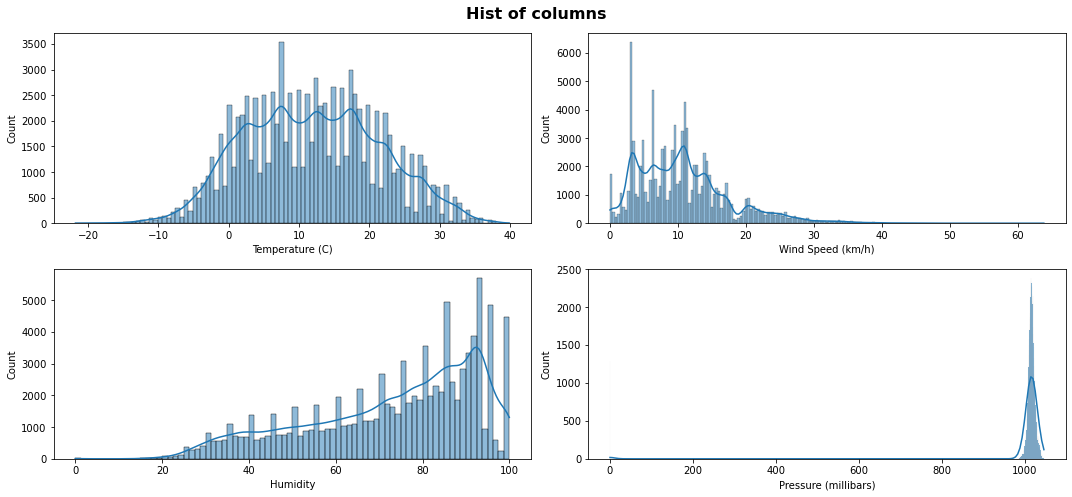

In [28]:
# sns.distplot(df5[['Temperature (C)','Wind Speed (km/h)','Humidity','Pressure (millibars)']], kde=True)
fig , axes = plt.subplots(figsize=(15,7) , nrows=2, ncols=2)
fig.suptitle('Hist of columns', fontsize=16, fontweight='bold')
i=0
j=0
columns = ['Temperature (C)', 'Wind Speed (km/h)', 'Humidity', 'Pressure (millibars)']
for col in columns:
    sns.histplot(ax=axes[i,j], data=df5, x=col, kde=True)
    if j == 1:
        i += 1
        j = 0
    else:
        j += 1

plt.tight_layout()

Text(0.5, 1.0, 'Heatmap of Correlation\n')

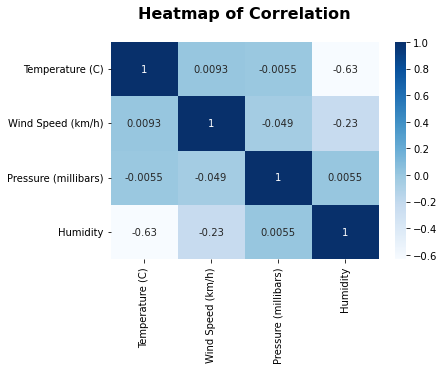

In [29]:
# Analysis nuemric - numeric
%matplotlib inline
sns.heatmap(df5.select_dtypes(['float64']).corr(), annot=True, cmap='Blues')
plt.title('Heatmap of Correlation\n', fontsize=16, fontweight='bold')

As can be seen in the heatmap and pairplot, only temperature and humidity have a high correlation, and the rest of the features do not have a high correlation with humidity.

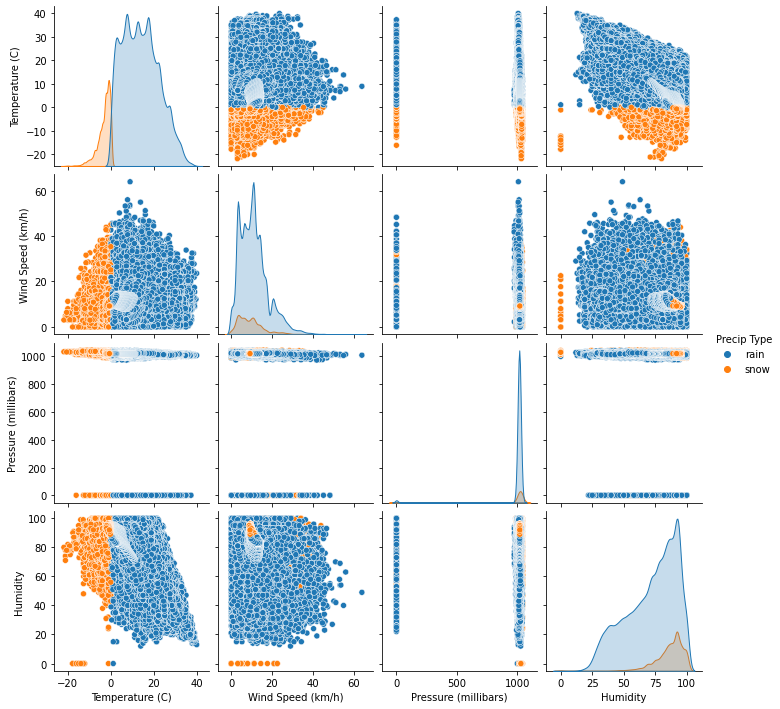

In [30]:
%matplotlib inline
sns.pairplot(data=df5, hue='Precip Type')

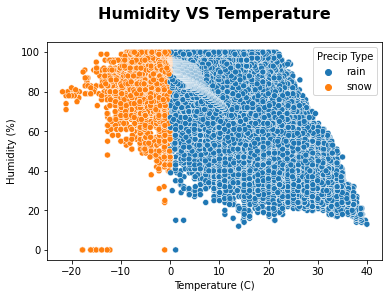

In [31]:
%matplotlib inline
markers = {"rain": "o", "snow": "o"}
sns.scatterplot(data=df5, x=df5['Temperature (C)'], y=df5['Humidity'], hue="Precip Type",style='Precip Type', markers=markers )
plt.title('Humidity VS Temperature\n', fontsize=16, fontweight='bold')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity (%)')
plt.show()

In [32]:
len(df5[df5['Pressure (millibars)']== 0])

1288

In [33]:
# Delete pressure == 0 and create heatmap and pairplot again
df6 = df5.copy()
df6 = df5[df5['Pressure (millibars)'] > 0]

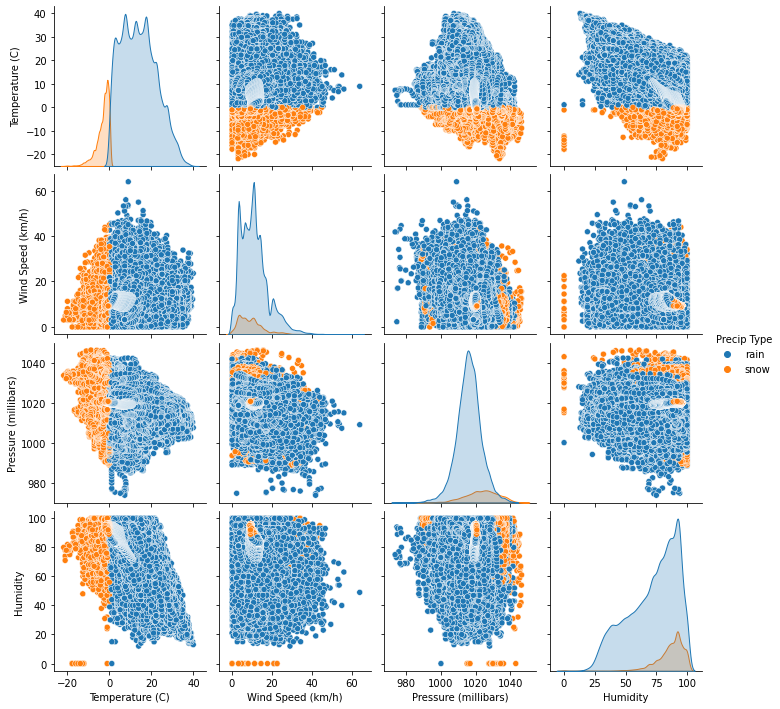

In [34]:
%matplotlib inline
sns.pairplot(data=df6, hue="Precip Type")

Text(0.5, 1.0, 'Heatmap of Correlation\n(drop zero pressure)\n')

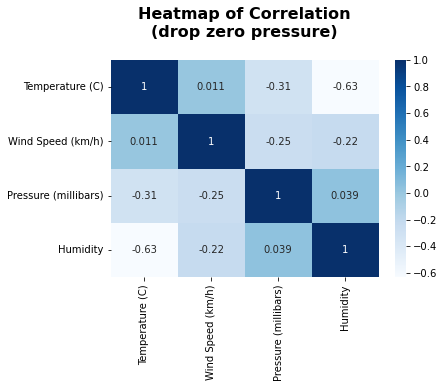

In [35]:
%matplotlib inline
sns.heatmap(df6.select_dtypes(['float64']).corr(), annot=True, cmap='Blues')
plt.title('Heatmap of Correlation\n(drop zero pressure)\n', fontsize=16, fontweight='bold')

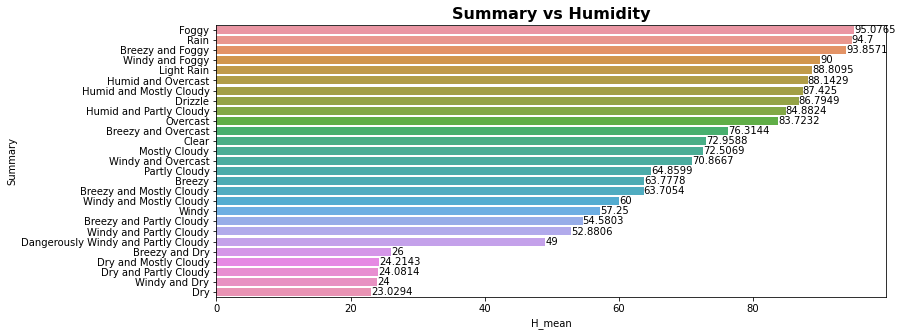

In [36]:
# Analysis numerice - categorical
# 1. groupby dataset by Summary and get mean and median
fig , ax = plt.subplots(figsize=(12,5))
h_mean = df5.groupby('Summary')['Humidity'].mean()
h_median = df5.groupby('Summary')['Humidity'].median()
new_df = pd.DataFrame({'Summary':h_mean.index, 
                       'H_mean':h_mean.values, 'H_median':h_median.values})
new_df = new_df.sort_values('H_mean', ascending=False).reset_index(drop=True)
sns.barplot(data=new_df, x=new_df.H_mean, y=new_df.Summary, order=new_df.Summary)
ax.bar_label(ax.containers[0])
plt.title('Summary vs Humidity', fontsize=16, fontweight='bold')
plt.show()

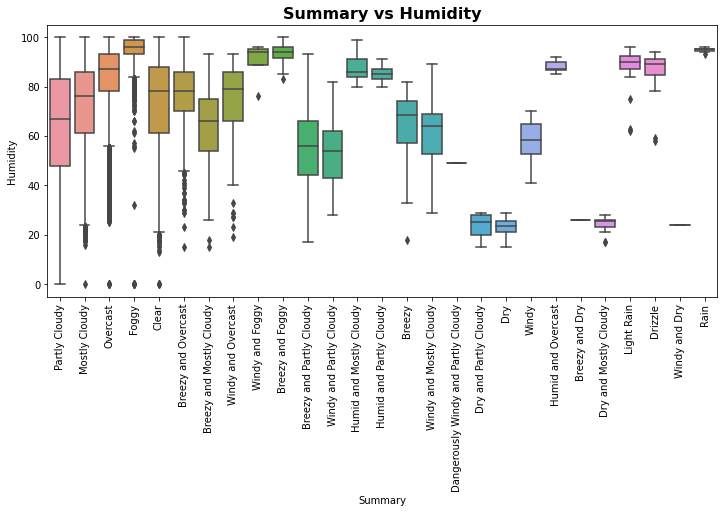

In [37]:
%matplotlib inline
plt.figure(figsize=(12,5))
sns.boxplot(x=df5.Summary, y=df5.Humidity)
plt.title('Summary vs Humidity', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

As can be seen from the figures above, humidity is the highest in Foggy, Rain, and Breezy and Foggy weather conditions, and in Dry, Windy and Dry, Dry and Partly Cloudy, and Dry and Mostly Cloudy weather conditions. The lowest humidity is observed.

In [38]:
# Analysis categorical - categorical
df6

Time        Summary Precip Type  \
Formatted Date                                                   
2005-12-31 23:00:00+00:00  23:00:00  Partly Cloudy        rain   
2006-01-01 00:00:00+00:00  00:00:00  Mostly Cloudy        rain   
2006-01-01 01:00:00+00:00  01:00:00  Mostly Cloudy        rain   
2006-01-01 02:00:00+00:00  02:00:00       Overcast        rain   
2006-01-01 03:00:00+00:00  03:00:00  Mostly Cloudy        rain   
...                             ...            ...         ...   
2016-12-31 18:00:00+00:00  18:00:00  Mostly Cloudy        rain   
2016-12-31 19:00:00+00:00  19:00:00  Mostly Cloudy        rain   
2016-12-31 20:00:00+00:00  20:00:00  Mostly Cloudy        snow   
2016-12-31 21:00:00+00:00  21:00:00  Mostly Cloudy        snow   
2016-12-31 22:00:00+00:00  22:00:00  Mostly Cloudy        snow   

                           Temperature (C)  Wind Speed (km/h)  \
Formatted Date                                                  
2005-12-31 23:00:00+00:00         0.577778            17.1143   
2006-01-01 00:00:00+00:00         1.161111            16.6152   
2006-01-01 01:00:00+00:00         1.666667            20.2538   
2006-01-01 02:00:00+00:00         1.711111            14.4900   
2006-01-01 03:00:00+00:00         1.183333            13.9426   
...                                    ...                ...   
2016-12-31 18:00:00+00:00         0.488889             9.7566   
2016-12-31 19:00:00+00:00         0.072222             9.4185   
2016-12-31 20:00:00+00:00        -0.233333             9.2736   
2016-12-31 21:00:00+00:00        -0.472222             9.2414   
2016-12-31 22:00:00+00:00        -0.677778             9.2253   

                           Pressure (millibars)  Humidity  
Formatted Date                                             
2005-12-31 23:00:00+00:00               1016.66      89.0  
2006-01-01 00:00:00+00:00               1016.15      85.0  
2006-01-01 01:00:00+00:00               1015.87      82.0  
2006-01-01 02:00:00+00:00               1015.56      82.0  
2006-01-01 03:00:00+00:00               1014.98      86.0  
...                                         ...       ...  
2016-12-31 18:00:00+00:00               1020.03      86.0  
2016-12-31 19:00:00+00:00               1020.27      88.0  
2016-12-31 20:00:00+00:00               1020.50      89.0  
2016-12-31 21:00:00+00:00               1020.65      91.0  
2016-12-31 22:00:00+00:00               1020.72      92.0  

[95141 rows x 7 columns]

In [39]:
cat = clean_data.groupby('Summary')['Type_rate'].mean().sort_values()
cat_df = pd.DataFrame(cat).reset_index()
cat_df.columns = ['Summary', 'Type_mean']
cat_df

Summary  Type_mean
0                      Breezy and Foggy   0.228571
1                                 Foggy   0.582820
2                       Windy and Foggy   0.750000
3                                Breezy   0.777778
4                              Overcast   0.843345
5                                 Clear   0.871976
6                   Breezy and Overcast   0.893939
7                         Mostly Cloudy   0.932868
8                    Windy and Overcast   0.933333
9                         Partly Cloudy   0.945786
10             Breezy and Mostly Cloudy   0.949612
11             Breezy and Partly Cloudy   0.981865
12              Windy and Mostly Cloudy   1.000000
13                        Windy and Dry   1.000000
14                                Windy   1.000000
15                                 Rain   1.000000
16              Humid and Mostly Cloudy   1.000000
17              Humid and Partly Cloudy   1.000000
18                   Humid and Overcast   1.000000
19                Dry and Partly Cloudy   1.000000
20                Dry and Mostly Cloudy   1.000000
21                                  Dry   1.000000
22                              Drizzle   1.000000
23  Dangerously Windy and Partly Cloudy   1.000000
24                       Breezy and Dry   1.000000
25                           Light Rain   1.000000
26              Windy and Partly Cloudy   1.000000

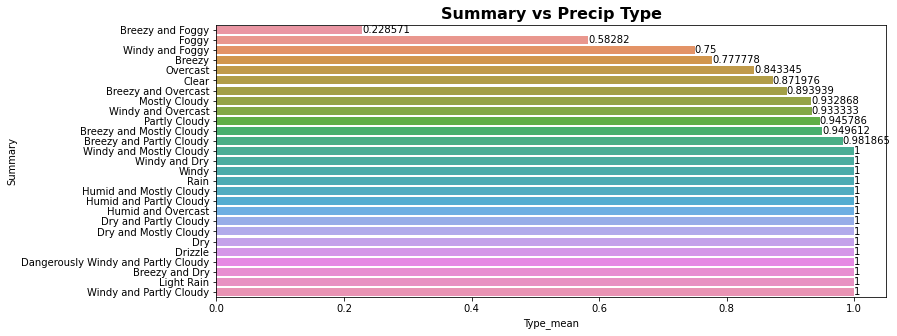

In [40]:
%matplotlib inline
fig , ax = plt.subplots(figsize=(12,5))
sns.barplot(data=cat_df, y=cat_df.Summary, x=cat_df.Type_mean)
ax.bar_label(ax.containers[0])
plt.title('Summary vs Precip Type', fontsize=16, fontweight='bold')
plt.show()

In [41]:
# create month column
df7 = df4.copy()
df7['month'] = df7['Date'].dt.month.astype('int64')

In [42]:
# create season column
df7['season'] = df7.month.copy()
seasons = {'spring':[3,4,5], 'summer':[6,7,8], 'autumn':[9,10,11], 'winter':[12,1,2]}
for key, value in seasons.items():
    df7.loc[df7.season.isin(value), 'season'] = key

In [43]:
# create part_of_day column
# 22:00
# 4:00
# 12:00
# 17:00
period = {'night':pd.date_range(start ='22:00:00' , periods=6, freq='h').time,
          'morning':pd.date_range(start='04:00:00', end='11:00:00', freq='h').time,
          'afternoon':pd.date_range(start='12:00:00', end='16:00:00', freq='h').time,
          'evening':pd.date_range(start='17:00:00', end='21:00:00', freq='h').time}

for key, value in period.items():
    df7.loc[df7.Time.isin(value), 'Part_of_day'] = key

In [44]:
# pdp.ProfileReport(df7)
df7

Date      Time        Summary Precip Type  Temperature (C)  \
0     2005-12-31  23:00:00  Partly Cloudy        rain         0.577778   
1     2006-01-01  00:00:00  Mostly Cloudy        rain         1.161111   
2     2006-01-01  01:00:00  Mostly Cloudy        rain         1.666667   
3     2006-01-01  02:00:00       Overcast        rain         1.711111   
4     2006-01-01  03:00:00  Mostly Cloudy        rain         1.183333   
...          ...       ...            ...         ...              ...   
96424 2016-12-31  18:00:00  Mostly Cloudy        rain         0.488889   
96425 2016-12-31  19:00:00  Mostly Cloudy        rain         0.072222   
96426 2016-12-31  20:00:00  Mostly Cloudy        snow        -0.233333   
96427 2016-12-31  21:00:00  Mostly Cloudy        snow        -0.472222   
96428 2016-12-31  22:00:00  Mostly Cloudy        snow        -0.677778   

       Wind Speed (km/h)  Pressure (millibars)  Humidity  month  season  \
0                17.1143               1016.66      89.0     12  winter   
1                16.6152               1016.15      85.0      1  winter   
2                20.2538               1015.87      82.0      1  winter   
3                14.4900               1015.56      82.0      1  winter   
4                13.9426               1014.98      86.0      1  winter   
...                  ...                   ...       ...    ...     ...   
96424             9.7566               1020.03      86.0     12  winter   
96425             9.4185               1020.27      88.0     12  winter   
96426             9.2736               1020.50      89.0     12  winter   
96427             9.2414               1020.65      91.0     12  winter   
96428             9.2253               1020.72      92.0     12  winter   

      Part_of_day  
0           night  
1           night  
2           night  
3           night  
4           night  
...           ...  
96424     evening  
96425     evening  
96426     evening  
96427     evening  
96428       night  

[96429 rows x 11 columns]

In [45]:
# result1 = pd.pivot_table(data=df7, index='season', columns='Precip Type', values='Humidity')
# sns.heatmap(result1, annot=True, cmap='RdYlGn', center=0.117)
# plt.show()

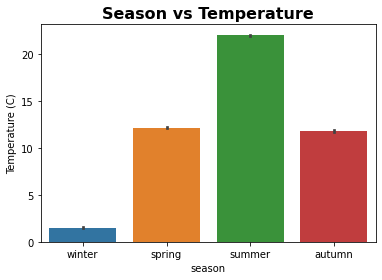

In [46]:
# draw barplot for Temperature in seasons
%matplotlib inline
sns.barplot(data=df7, x='season', y='Temperature (C)')
plt.title('Season vs Temperature', fontsize=16, fontweight='bold')
plt.show()

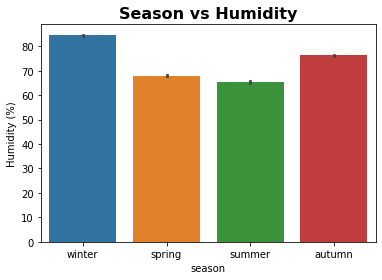

In [47]:
# draw barplot for Humidity in seasons
sns.barplot(data=df7, x='season', y='Humidity')
plt.title('Season vs Humidity', fontsize=16, fontweight='bold')
plt.ylabel('Humidity (%)')
plt.show()

According to the above graphs, the humidity in winter is higher than in other seasons, and in summer, as expected, we have the lowest humidity, and the highest temperature in summer and the lowest temperature in winter.

The time periods during the day have been divided into 4 parts with the following pattern:

Night = 22:00:00 – 03:00:00
Morning = 03:00:00 – 12:00:00
Afternoon = 12:00:00 – 18:00:00
Evening = 18:00:00 – 22:00:00
According to the graph above, the percentage of humidity at night is higher than at other times during the day, and as expected, we have the lowest percentage of humidity at noon between 12:00 and 18:00.

C:\Users\Partiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Partiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


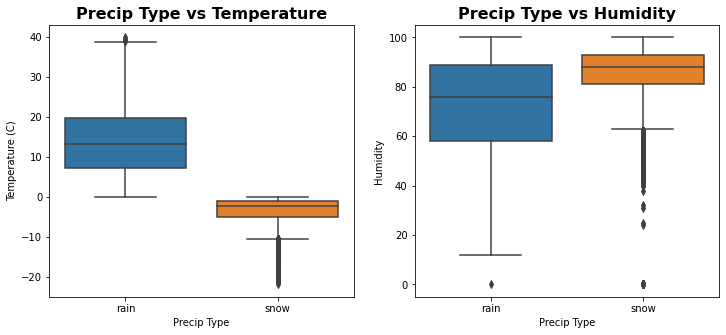

In [48]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,5), nrows=1, ncols=2)
sns.boxplot(df5['Precip Type'], df5['Temperature (C)'], ax=ax[0])
sns.boxplot(df5['Precip Type'], df5['Humidity'], ax=ax[1])

ax[0].set_title('Precip Type vs Temperature', fontsize=16, fontweight='bold')
ax[1].set_title('Precip Type vs Humidity', fontsize=16, fontweight='bold')
plt.show()

According to the graphs above, rain has occurred only at temperatures above zero, and the average temperature is around 13 degrees Celsius, and we have seen snowfall only at temperatures below zero.
The average humidity in snow precipitation is higher than the average humidity in rain precipitation.

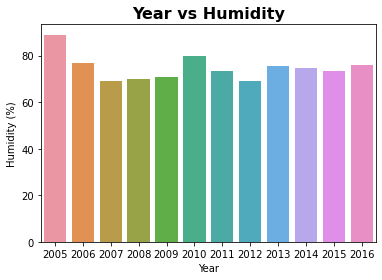

In [49]:
# draw barplot for Humidity in year
%matplotlib inline
sns.barplot(data=df_yearly, x=df_yearly.index.year, y='Humidity')
plt.title('Year vs Humidity', fontsize=16, fontweight='bold')
plt.ylabel('Humidity (%)')
plt.xlabel('Year')
# plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Year')

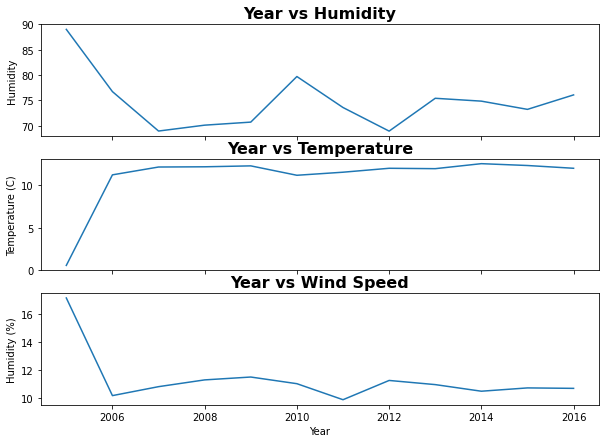

In [50]:
fig, ax = plt.subplots(figsize=(10,7),nrows=3,ncols=1, sharex=True)
sns.lineplot(data=df_yearly, x=df_yearly.index.year, y='Humidity', ax=ax[0])
sns.lineplot(data=df_yearly, x=df_yearly.index.year, y='Temperature (C)', ax=ax[1])
sns.lineplot(data=df_yearly, x=df_yearly.index.year, y='Wind Speed (km/h)', ax=ax[2])
ax[0].set_title('Year vs Humidity', fontsize=16, fontweight='bold')
ax[1].set_title('Year vs Temperature', fontsize=16, fontweight='bold')
ax[2].set_title('Year vs Wind Speed', fontsize=16, fontweight='bold')
# plt.xticks(np.arange(1,4020,500),np.arange(1,4020,500), rotation=90)
plt.ylabel('Humidity (%)')
plt.xlabel('Year')

As mentioned in the graphs above, here we can see in more detail that the lowest level of humidity is in 2012, and the highest level of humidity is in 2010, when the temperature has reached its lowest level over the years. related to.
As can be seen, during the years 2006 to 2016, we also see an alternating pattern in the percentage of humidity, so that until 2007, the humidity decreased, and then it started to rise, and it reached its peak until 2010, and again after that, a cycle of approx. The same occurs.
Here, contrary to the monthly analysis, wind speed and temperature have both decreased, but humidity has increased, and the pressure graph has a different behavior, and this indicates that these two parameters do not have a direct effect on temperature and humidity.

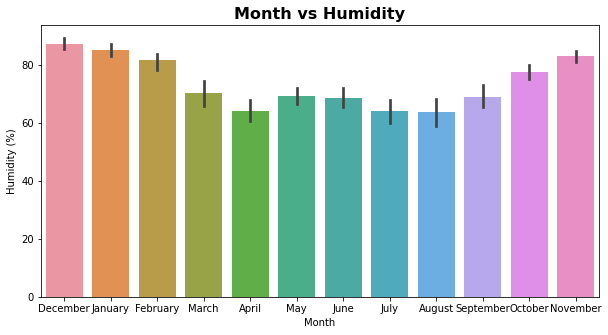

In [51]:
# draw barplot for Humidity in month
plt.figure(figsize=(10,5))
sns.barplot(data=df_monthly, x=df_monthly.index.strftime('%B'), y='Humidity')
plt.title('Month vs Humidity', fontsize=16, fontweight='bold')
plt.ylabel('Humidity (%)')
plt.xlabel('Month')
# plt.xticks(rotation=45)
plt.show()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

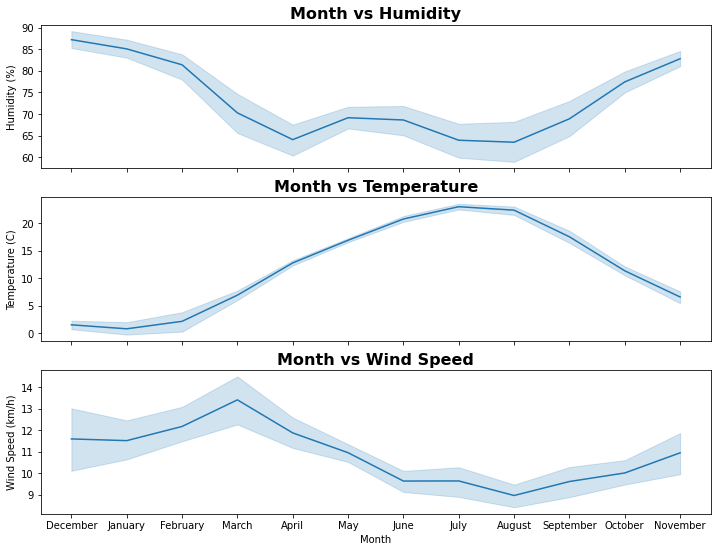

In [52]:
fig, ax = plt.subplots(figsize=(12,9),nrows=3,ncols=1, sharex=True)
sns.lineplot(data=df_monthly, x=df_monthly.index.strftime('%B'), y='Humidity', ax=ax[0])
sns.lineplot(data=df_monthly, x=df_monthly.index.strftime('%B'), y='Temperature (C)', ax=ax[1])
sns.lineplot(data=df_monthly, x=df_monthly.index.strftime('%B'), y='Wind Speed (km/h)', ax=ax[2])

ax[0].set_title('Month vs Humidity', fontsize=16, fontweight='bold')
ax[1].set_title('Month vs Temperature', fontsize=16, fontweight='bold')
ax[2].set_title('Month vs Wind Speed', fontsize=16, fontweight='bold')

ax[0].set_ylabel('Humidity (%)')
plt.xlabel('Month')


# plt.xticks(rotation=45)
plt.show()

According to the graph, the highest percentage of humidity is in December, which is the first month of winter, and the lowest percentage of humidity is in August, which is the last month of summer.
According to the graph, from the end of summer, i.e. the end of August, when the temperature has reached its peak, the percentage of humidity increases, and the percentage of humidity graph has an upward slope, and in winter, the graph has a downward slope, and this trend continues until spring and April. Then it goes through a similar cycle again.
In the monthly period, it seems that the wind speed had a little effect and with the increase in temperature and decrease in wind speed, the humidity decreased, but the pressure graph did not change much.

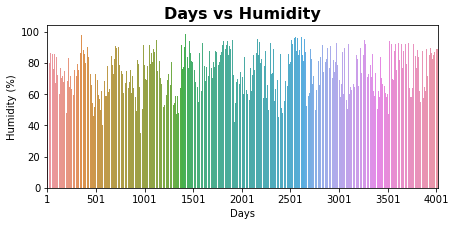

In [53]:
# draw barplot for Humidity in day
plt.figure(figsize=(7,3))
sns.barplot(data=df_daily, x=df_daily.index, y='Humidity')
plt.title('Days vs Humidity', fontsize=16, fontweight='bold')
plt.ylabel('Humidity (%)')
plt.xlabel('Days')
plt.xticks(np.arange(1,4020,500),np.arange(1,4020,500))
# plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Days')

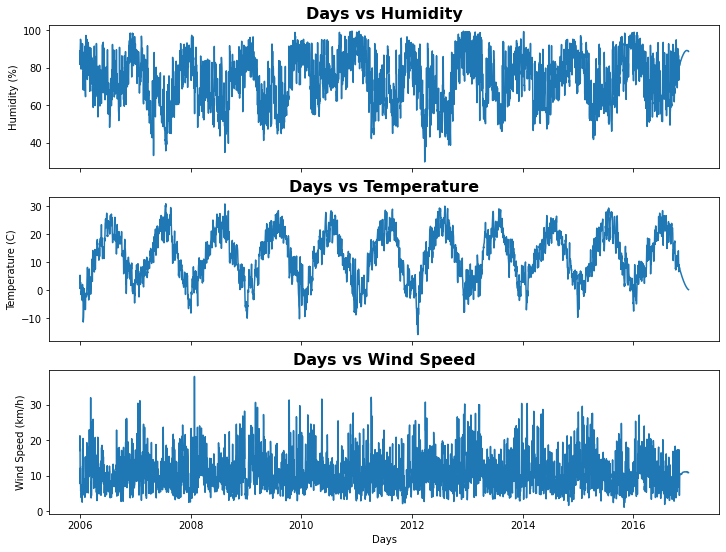

In [54]:
fig, ax = plt.subplots(figsize=(12,9),nrows=3,ncols=1, sharex=True)
sns.lineplot(data=df_daily, x=df_daily.index, y='Humidity', ax=ax[0])
sns.lineplot(data=df_daily, x=df_daily.index, y='Temperature (C)', ax=ax[1])
sns.lineplot(data=df_daily, x=df_daily.index, y='Wind Speed (km/h)', ax=ax[2])

ax[0].set_title('Days vs Humidity', fontsize=16, fontweight='bold')
ax[1].set_title('Days vs Temperature', fontsize=16, fontweight='bold')
ax[2].set_title('Days vs Wind Speed', fontsize=16, fontweight='bold')

# plt.xticks(np.arange(1,4020,500),np.arange(1,4020,500), rotation=90)
ax[0].set_ylabel('Humidity (%)')

plt.xlabel('Days')

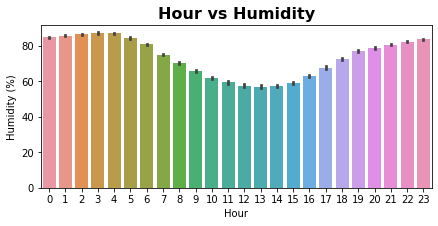

In [55]:
# draw barplot for Humidity in hour
plt.figure(figsize=(7,3))
sns.barplot(data=df_hourly, x=df_hourly.index.hour, y='Humidity')
plt.title('Hour vs Humidity', fontsize=16, fontweight='bold')
plt.ylabel('Humidity (%)')
plt.xlabel('Hour')
# plt.xticks(rotation=90)
plt.show()

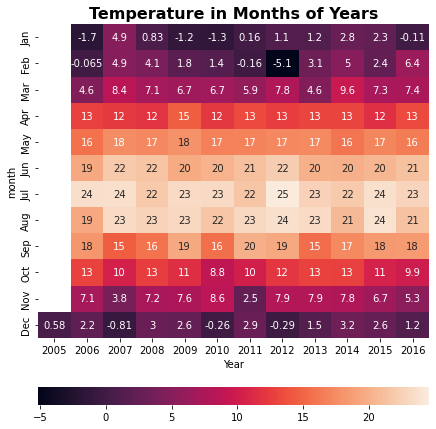

In [56]:
result2 = pd.pivot_table(data=df7, index='month', columns=df7.Date.dt.year, values='Temperature (C)')
%matplotlib inline
month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(figsize=(7,7), nrows=2, gridspec_kw=grid_kws)
ax = sns.heatmap(result2, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"}, ax=ax,
                 yticklabels=month_name, annot=True)

ax.set_title('Temperature in Months of Years', fontsize=16, fontweight='bold')

ax.set_xlabel('Year')
plt.show()

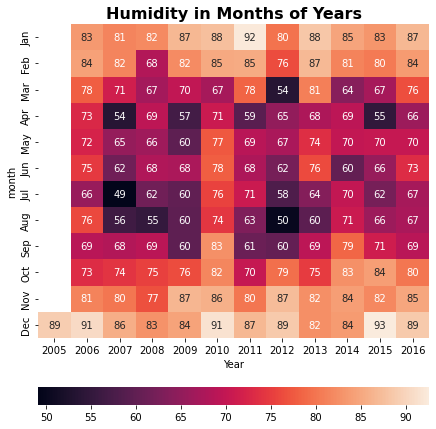

In [57]:
result2 = pd.pivot_table(data=df7, index='month', columns=df7.Date.dt.year, values='Humidity')
%matplotlib inline
month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(figsize=(7,7), nrows=2, gridspec_kw=grid_kws)
ax = sns.heatmap(result2, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"}, ax=ax,
                 yticklabels=month_name, annot=True)

ax.set_title('Humidity in Months of Years', fontsize=16, fontweight='bold')
ax.set_xlabel('Year')

plt.show()

Here too, the previous results can be seen in a more concrete way. As it is known, in the months of October to February, the percentage of humidity is high and the temperature is the lowest in these months

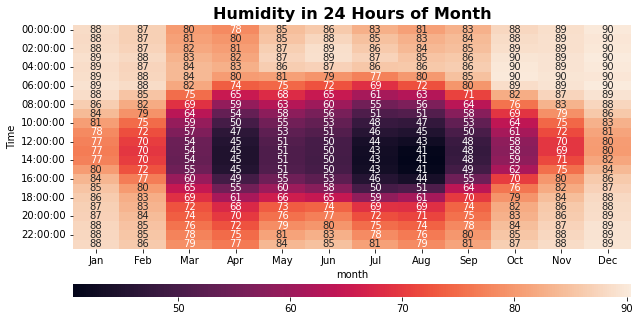

In [58]:
result2 = pd.pivot_table(data=df7, index=df7.Time, columns=df7.Date.dt.month, values='Humidity')
%matplotlib inline
month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# hours = np.arange(0,24)

grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(figsize=(10,5), nrows=2, gridspec_kw=grid_kws)
ax = sns.heatmap(result2, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"}, ax=ax,
                  annot=True, xticklabels=month_name)

ax.set_title('Humidity in 24 Hours of Month', fontsize=16, fontweight='bold')
ax.set_xlabel('month')
plt.show()

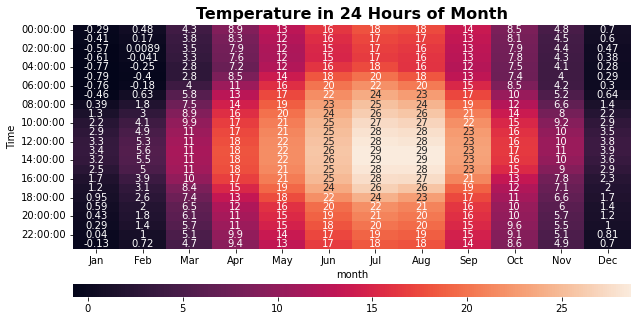

In [59]:
result2 = pd.pivot_table(data=df7, index=df7.Time, columns=df7.Date.dt.month, values='Temperature (C)')
%matplotlib inline
month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# hours = np.arange(0,24)

grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(figsize=(10,5), nrows=2, gridspec_kw=grid_kws)
ax = sns.heatmap(result2, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"}, ax=ax,
                  annot=True, xticklabels=month_name)

ax.set_title('Temperature in 24 Hours of Month', fontsize=16, fontweight='bold')
ax.set_xlabel('month')
plt.show()

These graphs also confirm the previous results and show that the humidity is lower in July and August at noon when the air temperature reaches its maximum value.

In [60]:
yearly_new = df_yearly[1:]

Text(0.5, 0, 'Year')

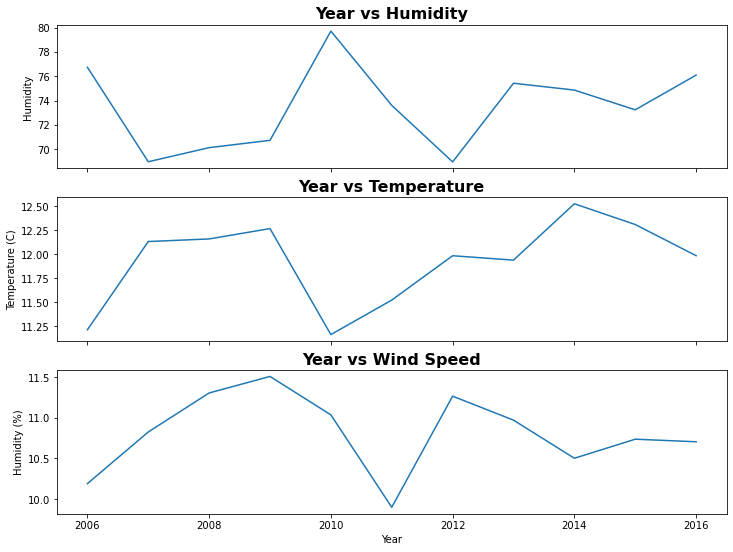

In [61]:
fig, ax = plt.subplots(figsize=(12,9),nrows=3,ncols=1, sharex=True)
sns.lineplot(data=yearly_new, x=yearly_new.index.year, y='Humidity', ax=ax[0])
sns.lineplot(data=yearly_new, x=yearly_new.index.year, y='Temperature (C)', ax=ax[1])
sns.lineplot(data=yearly_new, x=yearly_new.index.year, y='Wind Speed (km/h)', ax=ax[2])

ax[0].set_title('Year vs Humidity', fontsize=16, fontweight='bold')
ax[1].set_title('Year vs Temperature', fontsize=16, fontweight='bold')
ax[2].set_title('Year vs Wind Speed', fontsize=16, fontweight='bold')

# plt.xticks(np.arange(1,4020,500),np.arange(1,4020,500), rotation=90)
plt.ylabel('Humidity (%)')
plt.xlabel('Year')

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

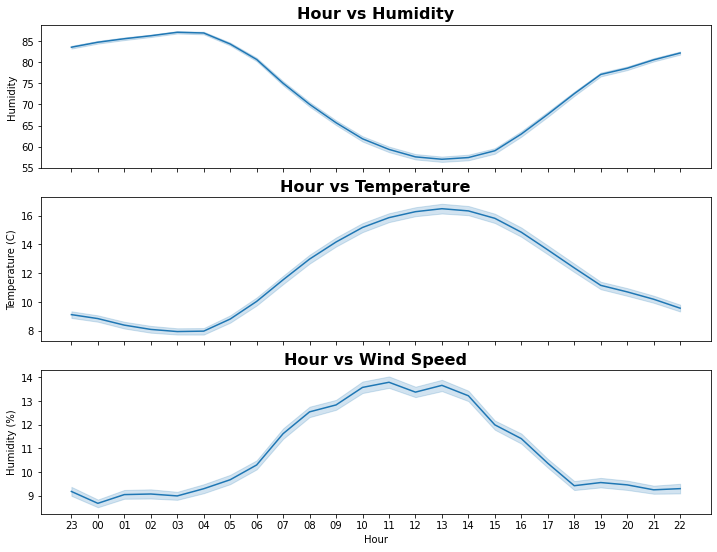

In [62]:
fig, ax = plt.subplots(figsize=(12,9),nrows=3,ncols=1, sharex=True)
sns.lineplot(data=df_hourly, x=df_hourly.index.strftime('%H'), y='Humidity', ax=ax[0])
sns.lineplot(data=df_hourly, x=df_hourly.index.strftime('%H'), y='Temperature (C)', ax=ax[1])
sns.lineplot(data=df_hourly, x=df_hourly.index.strftime('%H'), y='Wind Speed (km/h)', ax=ax[2])

ax[0].set_title('Hour vs Humidity', fontsize=16, fontweight='bold')
ax[1].set_title('Hour vs Temperature', fontsize=16, fontweight='bold')
ax[2].set_title('Hour vs Wind Speed', fontsize=16, fontweight='bold')

plt.ylabel('Humidity (%)')
plt.xlabel('Hour')


# plt.xticks(rotation=45)
plt.show()

In [63]:
df9 = df_hourly[df_hourly['Pressure (millibars)'] > 0]

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

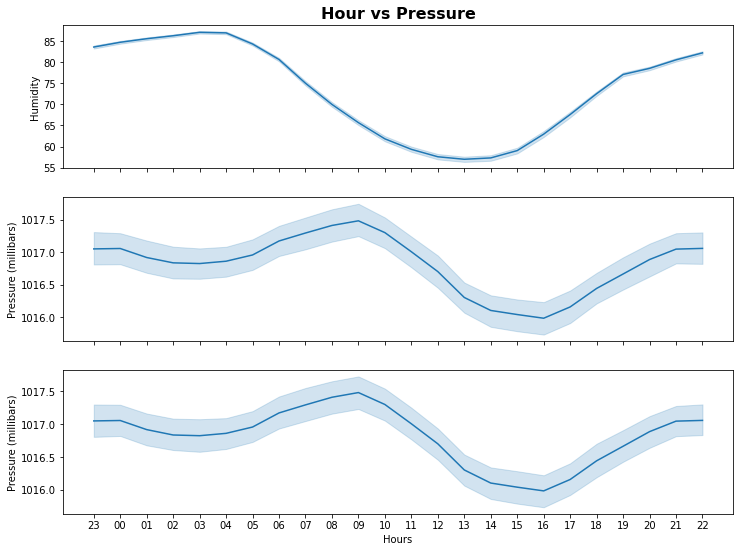

In [64]:
press1 = df_hourly[df_hourly['Pressure (millibars)'] > 0]
fig, ax = plt.subplots(figsize=(12,9),nrows=3,ncols=1, sharex=True)
sns.lineplot(data=press1, x=press1.index.strftime('%H'), y='Humidity', ax=ax[0])
sns.lineplot(data=press1, x=press1.index.strftime('%H'), y='Pressure (millibars)', ax=ax[1])
sns.lineplot(data=press1, x=press1.index.strftime('%H'), y='Pressure (millibars)', ax=ax[2])


ax[0].set_title('Hour vs Pressure', fontsize=16, fontweight='bold')
plt.xlabel('Hours')


# plt.xticks(rotation=45)
plt.show()

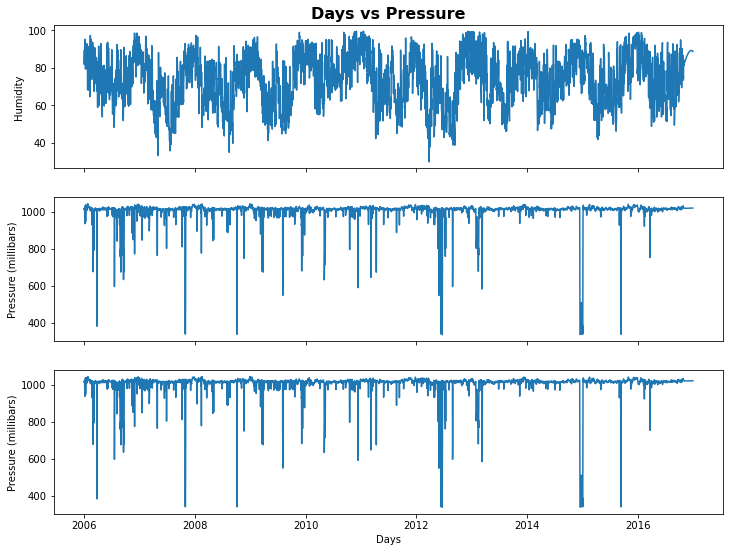

In [65]:
press2 = df_daily[df_daily['Pressure (millibars)'] > 0]
fig, ax = plt.subplots(figsize=(12,9),nrows=3,ncols=1, sharex=True)
sns.lineplot(data=press2, x=press2.index, y='Humidity', ax=ax[0])
sns.lineplot(data=press2, x=press2.index, y='Pressure (millibars)', ax=ax[1])
sns.lineplot(data=press2, x=press2.index, y='Pressure (millibars)', ax=ax[2])


ax[0].set_title('Days vs Pressure', fontsize=16, fontweight='bold')
plt.xlabel('Days')
plt.show()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

Text(0.5, 0, 'Months')

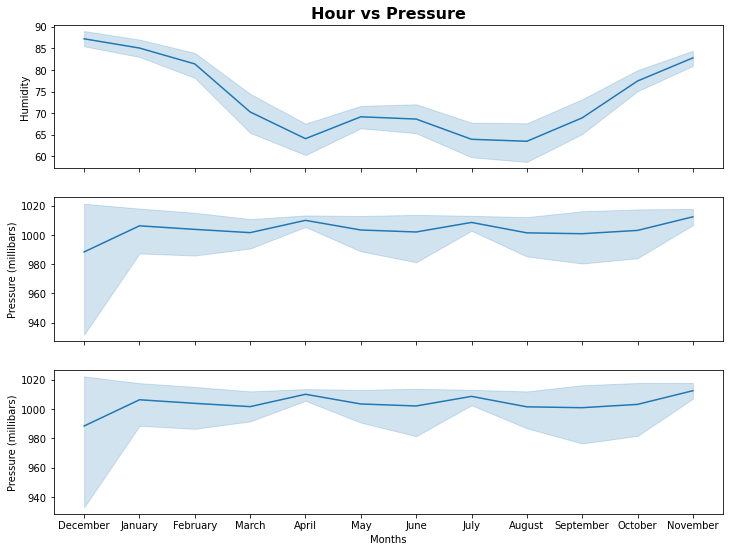

In [66]:
press3 = df_monthly[df_monthly['Pressure (millibars)'] > 0]
fig, ax = plt.subplots(figsize=(12,9),nrows=3,ncols=1, sharex=True)
sns.lineplot(data=press3, x=press3.index.strftime('%B'), y='Humidity', ax=ax[0])
sns.lineplot(data=press3, x=press3.index.strftime('%B'), y='Pressure (millibars)', ax=ax[1])
sns.lineplot(data=press3, x=press3.index.strftime('%B'), y='Pressure (millibars)', ax=ax[2])


ax[0].set_title('Hour vs Pressure', fontsize=16, fontweight='bold')
plt.xlabel('Months')

Text(0.5, 0, 'Years')

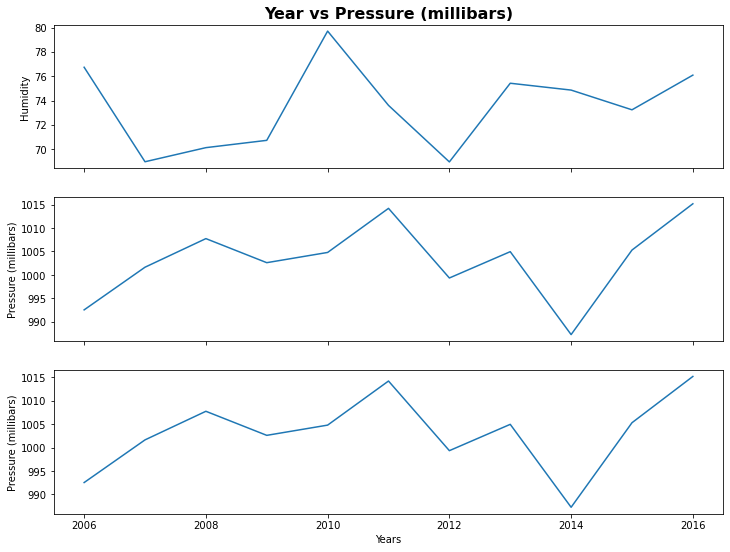

In [67]:
press4 = yearly_new[yearly_new['Pressure (millibars)'] > 0]
fig, ax = plt.subplots(figsize=(12,9),nrows=3,ncols=1, sharex=True)
sns.lineplot(data=press4, x=press4.index.year, y='Humidity', ax=ax[0])
sns.lineplot(data=press4, x=press4.index.year, y='Pressure (millibars)', ax=ax[1])
sns.lineplot(data=press4, x=press4.index.year, y='Pressure (millibars)', ax=ax[2])


ax[0].set_title('Year vs Pressure (millibars)', fontsize=16, fontweight='bold')

# plt.xticks(np.arange(1,4020,500),np.arange(1,4020,500), rotation=90)
plt.xlabel('Years')